In [6]:
#IMPORTING LIBRARIES
from datetime import datetime
from datetime import timedelta
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

In [7]:
#Downloading Data Set
start_date = datetime(2022,9, 13)
end_date = datetime(2022, 9, 14)
data = yf.download('^NSEBANK', start=start_date, end=end_date,interval="30m")

[*********************100%***********************]  1 of 1 completed


In [15]:
df = pd.DataFrame(data)
df = df[["Open","High","Low","Close"]]
df = df.reset_index()
df

,Datetime,Open,High,Low,Close
0,2022-09-13 09:00:00+05:30,40802.101562,40802.101562,40717.050781,40753.750000
1,2022-09-13 09:30:00+05:30,40755.699219,40829.949219,40748.601562,40812.300781
2,2022-09-13 10:00:00+05:30,40810.800781,40820.898438,40757.101562,40762.550781
3,2022-09-13 10:30:00+05:30,40762.500000,40822.351562,40737.648438,40773.699219
4,2022-09-13 11:00:00+05:30,40776.851562,40781.949219,40715.851562,40741.750000
5,2022-09-13 11:30:00+05:30,40740.648438,40780.000000,40694.800781,40766.101562
6,2022-09-13 12:00:00+05:30,40766.351562,40800.351562,40748.300781,40784.000000
7,2022-09-13 12:30:00+05:30,40782.449219,40795.398438,40729.550781,40763.398438
8,2022-09-13 13:00:00+05:30,40763.601562,40791.449219,40753.250000,40768.800781
9,2022-09-13 13:30:00+05:30,40766.050781,40836.601562,40751.851562,40817.699219


In [9]:
#Cleaning And Filtering
df['Date'] = pd.to_datetime(df['Datetime']).dt.date
df['Time'] = pd.to_datetime(df['Datetime']).dt.time
df = df.round(2)

df.drop(['Datetime'],axis=1,inplace=True)
df = df.filter(['Date','Time','Open','High','Low','Close'])
df

,Date,Time,Open,High,Low,Close
0,2022-09-13,09:00:00,40802.10,40802.10,40717.05,40753.75
1,2022-09-13,09:30:00,40755.70,40829.95,40748.60,40812.30
2,2022-09-13,10:00:00,40810.80,40820.90,40757.10,40762.55
3,2022-09-13,10:30:00,40762.50,40822.35,40737.65,40773.70
4,2022-09-13,11:00:00,40776.85,40781.95,40715.85,40741.75
5,2022-09-13,11:30:00,40740.65,40780.00,40694.80,40766.10
6,2022-09-13,12:00:00,40766.35,40800.35,40748.30,40784.00
7,2022-09-13,12:30:00,40782.45,40795.40,40729.55,40763.40
8,2022-09-13,13:00:00,40763.60,40791.45,40753.25,40768.80
9,2022-09-13,13:30:00,40766.05,40836.60,40751.85,40817.70


In [10]:
    #Creating bins
    hi = df['High'].max()+1
    lo = df['Low'].min()
    timeframe = 30
    n = ceil(375/timeframe)
    i = int((hi - lo)/n)
    bins = [int(lo)]
    tp = int(lo)
    while tp < hi:
        tp+=i
        bins.append(tp)
    bins
    dic = {}
    for i in bins:
        dic.update({i:""})
    i = 0
    for i in range(len(df)):
        hi = df['High'][i]
        lo = df['Low'][i]
        for j in dic:
            if hi>=j>=lo:
                dic[j]=dic[j]+chr(65+i)
    print(dic)

{40694: '', 40710: 'F', 40726: 'AEF', 40742: 'ADEFH', 40758: 'ABCDEFGHIJ', 40774: 'ABCDEFGHIJ', 40790: 'ABCDGHIJK', 40806: 'BCDJK', 40822: 'BDJK', 40838: 'KLM', 40854: 'KLM', 40870: 'LM', 40886: 'LM', 40902: 'LM', 40918: ''}


In [11]:
    #VALUE AREA
    sum = 0
    count = 0
    max1 = []
    max = 0
    indec = None
    for (j,i) in dic.items():
        if max == 0:
            max = len(i)
            indec = j
            num = count
        elif len(i) > max:
            max = len(i)
            indec = j
            num = count
        max1.append(len(i))
        sum += len(i)
        count += 1
    seventy = 0.7*sum
    seventy = round(seventy)
    print(max1,seventy)

    up = num-1
    down= num+1
    edit = None
    ref = max1[num]
    while ref <= seventy:
        if up < 0 or down > len(bins):
            if up<0:
                ref+= max1[down]
                edit = True
            elif down > len(bins):
                ref+=max1[up]
                edit = False
        else:
            if max1[up]<max1[down]:
                ref +=max1[down]
                edit = True
                down+=1
            else:
                ref +=max1[up]
                edit = False
                up-=1
    if  edit == False:
        up +=1
    elif edit == True:
        down-= 1
    up+=1
    print(up,down)

[0, 1, 3, 5, 10, 10, 9, 5, 4, 3, 3, 2, 2, 2, 0] 41
3 8


In [12]:
    df_dic = pd.DataFrame.from_dict(dic,orient='index')
    df_dic.reset_index(inplace=True)
    df_dic['IDX']=np.arange(0,len(df_dic))
    df_dic.rename(columns={'index':'Price',0:'TPO'},inplace=True)
    df_dic

,Price,TPO,IDX
0,40694,,0
1,40710,F,1
2,40726,AEF,2
3,40742,ADEFH,3
4,40758,ABCDEFGHIJ,4
5,40774,ABCDEFGHIJ,5
6,40790,ABCDGHIJK,6
7,40806,BCDJK,7
8,40822,BDJK,8
9,40838,KLM,9


In [13]:
    #Highlighting Value Area
    del df_dic["IDX"]
    m = []
    for i in df_dic["TPO"]:
        m.append(len(i))
    print(m)
    df_dic["Count"] = m

    df_dic.style.apply(lambda x: ['background: #fffd75' if ((up <= x.name <= down)) else '' for i in x], axis=1)

[0, 1, 3, 5, 10, 10, 9, 5, 4, 3, 3, 2, 2, 2, 0]


,Price,TPO,Count
0,40694,,0
1,40710,F,1
2,40726,AEF,3
3,40742,ADEFH,5
4,40758,ABCDEFGHIJ,10
5,40774,ABCDEFGHIJ,10
6,40790,ABCDGHIJK,9
7,40806,BCDJK,5
8,40822,BDJK,4
9,40838,KLM,3


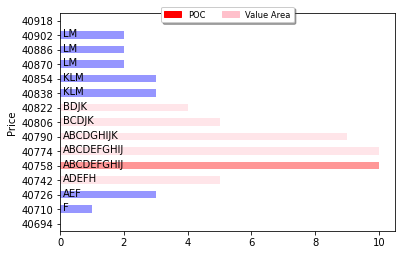

In [14]:
    #Visualisation(TPO CHART)
    col = []
    for i in range(len(bins)):
        col.append("blue")
    for i in range(up,down+1):
        col[i]="pink"
    col[num] = "red"
    df_dic.plot.barh(y="Count",x="Price",color = col,alpha = 0.41)
    colors = {'POC':'red', 'Value Area':'pink'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((-3,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels,fontsize = "small",loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
    haha = []
    for i in df_dic["TPO"]:
        haha.append(i)
    for a,b in enumerate(haha):
        c = df_dic["Count"][a]
        plt.annotate(b,(0.1,a-0.1))